# Интеллектуальный анализ данных – весна 2025
# Домашнее задание 6: классификация текстов

Правила:



*   Домашнее задание оценивается в 10 баллов.
*   Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.
*  Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.
*  Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.
*  Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.
* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

В этом домашнем задании вам предстоит построить классификатор текстов.

Будем предсказывать эмоциональную окраску твиттов о коронавирусе.



In [4]:

import pandas as pd

In [6]:
df = pd.read_csv('tweets_coronavirus.csv', encoding='latin-1')
df.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
14028,20831,65783,Nigeria/Ghana/Germany/USA,23-03-2020,American vodka company Tito's Vodka says it is...,Positive
17702,25330,70282,YourMom'sPants,25-03-2020,@97Vercetti @whitneywrightx You've seen the vi...,Extremely Negative
7270,12628,57580,Qazvin,20-03-2020,Supermarkets are really taking advantage of th...,Positive
20191,28418,73370,Sojourner BTW Realms,27-03-2020,Police have charged Margaret Cirko 35 with mak...,Extremely Negative


Для каждого твитта указано:


*   UserName - имя пользователя, заменено на целое число для анонимности
*   ScreenName - отображающееся имя пользователя, заменено на целое число для анонимности
*   Location - местоположение
*   TweetAt - дата создания твитта
*   OriginalTweet - текст твитта
*   Sentiment - эмоциональная окраска твитта (целевая переменная)



## Задание 1 Подготовка (0.5 балла)

Целевая переменная находится в колонке `Sentiment`.  Преобразуйте ее таким образом, чтобы она стала бинарной: 1 - если у твитта положительная или очень положительная эмоциональная окраска и 0 - если отрицательная или очень отрицательная.

In [7]:
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x in ['Positive', 'Extremely Positive'] else (
    0 if x in ['Negative', 'Extremely Negative'] else None))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
1,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
2,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
3,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
4,3804,48756,"ÃÂT: 36.319708,-82.363649",16-03-2020,As news of the regionÃÂs first confirmed COV...,1


Сбалансированы ли классы?

In [8]:
df['Sentiment'].value_counts(normalize=1)

Sentiment
1    0.539589
0    0.460411
Name: proportion, dtype: float64

**Ответ:** Да

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их строкой 'Unknown'.

In [10]:
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [12]:
df = df.fillna('Unknown')
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
1,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
2,3802,48754,Unknown,16-03-2020,My food stock is not the only one which is emp...,1
3,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",0
4,3804,48756,"ÃÂT: 36.319708,-82.363649",16-03-2020,As news of the regionÃÂs first confirmed COV...,1


Разделите данные на обучающие и тестовые в соотношении 7 : 3 и укажите `random_state=0`

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=0)

## Задание 2 Токенизация (3 балла)

Постройте словарь на основе обучающей выборки и посчитайте количество встреч каждого токена с использованием самой простой токенизации - деления текстов по пробельным символам и приведения токенов в нижний регистр.

In [15]:
from collections import defaultdict

token_dict = defaultdict(int)

for tweet in train['OriginalTweet']:
    tokens = str(tweet).lower().split()
    for token in tokens:
        token_dict[token] += 1

token_dict

defaultdict(int,
            {'why': 654,
             'we': 3787,
             'still': 763,
             'want': 487,
             'to': 23373,
             'buy': 748,
             'so': 1837,
             'much': 482,
             'stuff': 106,
             'during': 1908,
             'quarantine': 154,
             'https://t.co/1m881cwfuv': 1,
             '#shopping': 121,
             '#covid_19': 1660,
             '#online': 40,
             'with': 4063,
             'driving': 77,
             'even': 682,
             'more': 2008,
             'usage': 22,
             'a': 11737,
             'strong': 93,
             'strategy': 33,
             'is': 7383,
             'critical': 156,
             'now': 1349,
             'then': 435,
             'ever': 179,
             'luckily': 8,
             'and': 14684,
             'april': 163,
             '16': 36,
             'webinar': 65,
             'will': 2726,
             'dive': 10,
             'into': 666

Какой размер словаря получился?

In [16]:
len(token_dict)

79755

Выведите 10 самых популярных токенов с количеством встреч каждого из них. Объясните, почему именно эти токены в топе.

In [36]:
sorted_tokens = dict(sorted(token_dict.items(), key=lambda item: item[1], reverse=True))
print(list(sorted_tokens.items())[:10])

[('the', 26815), ('to', 23373), ('and', 14684), ('of', 13012), ('a', 11737), ('in', 11198), ('for', 8566), ('#coronavirus', 8223), ('is', 7383), ('are', 7050)]


**Ответ:** Самые популярные — союзы и артикли, которые используется вне зависимости от темы, почти в каждом сообщении, исключение — короновирус, потому что тема ключевая для 2020 года, соответственно, на эту тему много твитов

Удалите стоп-слова из словаря и выведите новый топ-10 токенов (и количество встреч) по популярности.  Что можно сказать  о нем?

In [42]:

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

filtered_tokens = {token: count for token, count in sorted_tokens.items()
                   if token not in stop_words}

print(list(filtered_tokens.items())[:10])

[('#coronavirus', 8223), ('prices', 3891), ('food', 3820), ('grocery', 3469), ('supermarket', 3288), ('people', 3175), ('covid-19', 3173), ('store', 3155), ('#covid19', 2471), ('&amp;', 2314)]


**Ответ:** В словаре теперь тематические токены

Также выведите 20 самых непопулярных слов (если самых непопулярных слов больше, выведите любые 20 из них) Почему эти токены непопулярны, требуется ли как-то дополнительно работать с ними?

In [43]:
print(list(filtered_tokens.items())[-20:])

[('skellig', 1), ('coast!', 1), ('closer!)', 1), ('@skelligsix18', 1), ('#skelligcoast2kms', 1), ('#southkerry', 1), ('https://t.co/zjcl195vqs', 1), ('@srinivasiyc', 1), ('https://t.co/iaek4fwsgz', 1), ('premiership', 1), ('non-playing', 1), ('subsidise', 1), ('playersã\x82â\x92', 1), ('renewing', 1), ('wage!', 1), ('flew', 1), ('nothing...', 1), ('@torontopearson', 1), ('@680news', 1), ('https://t.co/7j2y3rsld9', 1)]


**Ответ:** Ссылки, придуманные слова и непопулярные теги, которые используются частными пользователями



Теперь воспользуемся токенайзером получше - TweetTokenizer из библиотеки nltk. Примените его и посмотрите на топ-10 популярных слов. Чем он отличается от топа, который получался раньше? Почему?

In [58]:
from collections import Counter
from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer()
token_counter = Counter()

for tweet in train['OriginalTweet']:
    tokens = tk.tokenize(tweet)
    token_counter.update(tokens)

print(token_counter.most_common(10))

[('the', 24337), ('.', 24118), ('to', 22933), (',', 17571), ('and', 14354), ('of', 12904), ('a', 11045), ('in', 10573), ('?', 9524), ('for', 8228)]


**Ответ:** В целом, похоже на то, что получилось в первом случае, но чуть другой порядок и появились знаки препинания

Удалите из словаря стоп-слова и пунктуацию, посмотрите на новый топ-10 слов с количеством встреч, есть ли теперь в нем что-то не похожее на слова?

In [59]:
from string import punctuation

filtered_tokens = {token: count for token, count in
                   sorted(token_counter.items(), key=lambda item: item[1], reverse=True)
                   if token not in punctuation and token not in stop_words}

print(list(filtered_tokens.items())[:10])

[('Â', 7415), ('\x82', 7311), ('19', 7167), ('#coronavirus', 7143), ('I', 5235), ('\x92', 4372), ('prices', 4281), ('COVID', 4218), ('food', 3795), ('store', 3691)]


**Ответ:** Есть символы для переноса строки и какие-то кодировки

Скорее всего в некоторых топах были неотображаемые символы или отдельные буквы не латинского алфавита. Уберем их: удалите из словаря токены из одного символа, позиция которого в таблице Unicode 128 и более (`ord(x) >= 128`)

Выведите топ-10 самых популярных и топ-20 непопулярных слов. Чем полученные топы отличаются от итоговых топов, полученных при использовании токенизации по пробелам? Что теперь лучше, а что хуже?

In [60]:
filtered_tokens = {token: count for token, count in filtered_tokens.items() if
                   not (len(token) == 1 and ord(token) >= 128)}

print(list(filtered_tokens.items())[:10])
print(list(filtered_tokens.items())[-20:])

[('19', 7167), ('#coronavirus', 7143), ('I', 5235), ('prices', 4281), ('COVID', 4218), ('food', 3795), ('store', 3691), ('supermarket', 3373), ('grocery', 3083), ('people', 3047)]
[('ruins', 1), ('now.When', 1), ('milion', 1), ('Skellig', 1), ('@SkelligSix18', 1), ('#SkelligCoast2kms', 1), ('#SouthKerry', 1), ('https://t.co/zJcL195VQS', 1), ('@srinivasiyc', 1), ('https://t.co/IAEK4fWsgz', 1), ('Vile', 1), ('premiership', 1), ('non-playing', 1), ('subsidise', 1), ('playersÃ', 1), ('renewing', 1), ('flew', 1), ('@TorontoPearson', 1), ('@680NEWS', 1), ('https://t.co/7j2Y3rSld9', 1)]


**Ответ:** В топ-10 все в порядке, в топ-20(с конца) много ссылок и непопулярных тегов

Выведите топ-10 популярных хештегов (токены, первые символы которых - #) с количеством встреч. Что можно сказать о них?

In [63]:
print(list({token: count for token, count in filtered_tokens.items() if token.startswith('#')}.items())[:10])

[('#coronavirus', 7143), ('#COVID19', 1844), ('#Covid_19', 1463), ('#Coronavirus', 1281), ('#COVID2019', 927), ('#toiletpaper', 657), ('#covid19', 568), ('#COVID', 542), ('#CoronaCrisis', 426), ('#CoronaVirus', 351)]


**Ответ:** Большинство связано с ковидом, потому что он был на хайпе в 20 году

То же самое проделайте для ссылок на сайт https://t.co Сравнима ли популярность ссылок с популярностью хештегов? Будет ли информация о ссылке на конкретную страницу полезна?

In [64]:
print(list({token: count for token, count in filtered_tokens.items() if token.startswith('https://t.co')}.items())[:10])

[('https://t.co/oXA7SWtoNd', 5), ('https://t.co/gP3EusapL8', 4), ('https://t.co/DefTruI1PfÃ\x82Â', 3), ('https://t.co/WrLHYzIzAA', 3), ('https://t.co/kuwIpF1KQW', 3), ('https://t.co/zjNRx6dKKN', 3), ('https://t.co/3GBBDpdjat', 3), ('https://t.co/e2ZNXajPre', 3), ('https://t.co/CATKegAyOY', 3), ('https://t.co/G63RP042HO', 3)]


**Ответ:** Упоминание самой популярной ссылки — 5, что говорит о том, что они гораздо менее популярны и информации о самых популярных не несет полезной нагрузки

Используем опыт предыдущих экспериментов и напишем собственный токенайзер, улучшив TweetTokenizer. Функция tokenize должна:



*   Привести текст в нижний регистр
*   Применить TweetTokenizer для  выделения токенов
*   Удалить стоп-слова, пунктуацию, токены из одного символа с позицией в таблице Unicode 128 и более,  ссылки на t.co



In [67]:
def custom_tokenizer(text):
    filtered_tokens = []
    text = text.lower()
    tokens = tk.tokenize(text)

    for token in tokens:
        if not (token in stop_words or token in punctuation or (len(token) == 1 and ord(token) >= 128) or token.startswith('https://t.co')):
            filtered_tokens.append(token)

    return filtered_tokens


In [68]:
custom_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext')

['sample', 'text', '@sample_text', '#sampletext']

## Задание 3 Векторизация текстов (2 балла)

Обучите CountVectorizer с использованием custom_tokenizer в качестве токенайзера. Как размер полученного словаря соотносится с размером изначального словаря из начала задания 2?

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=custom_tokenizer)
cv.fit(train['OriginalTweet'])

print(len(cv.vocabulary_))

/opt/miniconda3/envs/omo/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


45290


**Ответ:** Словарь уменьшился

Посмотрим на какой-нибудь конкретный твитт:

In [70]:
ind = 9023
train.iloc[ind]['OriginalTweet'], train.iloc[ind]['Sentiment']

('Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs',
 0)

Автор твитта не доволен ситуацией с едой во Франции и текст имеет резко негативную окраску.

Примените обученный CountVectorizer для векторизации данного текста, и попытайтесь определить самый важный токен и самый неважный токен (токен, компонента которого в векторе максимальна/минимальна, без учета 0). Хорошо ли они определились, почему?

In [74]:
X = cv.transform([train.iloc[ind]['OriginalTweet']])
vector_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
vector_df.loc[:, (vector_df != 0).any(axis=0)]

,#coronavirusoutbreak,#covid2019,@skynews,brainless,ffs,food,france,lets,nice,one,panic,ppl,queueing,show
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1


**Ответ:** Все ненулевые векторы равны единице, по сути ничего не определилось

Теперь примените TfidfVectorizer и  определите самый важный/неважный токены. Хорошо ли определились, почему?

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(tokenizer=custom_tokenizer).fit(train['OriginalTweet'])
X = tfidf_vec.transform([train.iloc[9023]['OriginalTweet']])

vector_df = pd.DataFrame(X.toarray(), columns=tfidf_vec.get_feature_names_out())
vector_df.loc[:, (vector_df != 0).any(axis=0)]

/opt/miniconda3/envs/omo/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,#coronavirusoutbreak,#covid2019,@skynews,brainless,ffs,food,france,lets,nice,one,panic,ppl,queueing,show
0,0.225843,0.168252,0.310426,0.386764,0.324474,0.113289,0.320473,0.301211,0.254273,0.163067,0.147595,0.255006,0.354346,0.244065


**Ответ:** Да, так как учитывает частоту слова в тексте

Найдите какой-нибудь положительно окрашенный твитт, где TfidfVectorizer хорошо (полезно для определения окраски) выделяет важный токен, поясните пример.

*Подсказка:* явно положительные твитты можно искать при помощи положительных слов (good, great, amazing и т. д.)

In [78]:
train[train['OriginalTweet'].apply(lambda x: 'good' in x) & (train['Sentiment'] == 1)]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
21541,30079,75031,Unknown,02-04-2020,"To all my marketers friends, this is a very go...",1
20314,28576,73528,"New Delhi, India",27-03-2020,India on lockdown...I'm more worried by death ...,1
192,4035,48987,"San Diego, CA",16-03-2020,"What's a good way to support grocery store, me...",1
5140,10048,55000,New Zealand,19-03-2020,Countdown supermarket limiting some goods: You...,1
19139,27090,72042,Unknown,25-03-2020,@MorganRadford good segment! BTW where did yo...,1
...,...,...,...,...,...,...
19361,27366,72318,Unknown,26-03-2020,@jichiemin LetÃÂs hope it not #coronavirus ?...,1
6250,11382,56334,"Mumbai, India",19-03-2020,Respected Sir @narendramodi \r\r\n\r\r\nWe und...,1
15997,23260,68212,sales@esmmagazine.com,24-03-2020,#Consumer goods giant @Unilever Plc said on Tu...,1
18819,26706,71658,"Chicago, IL",25-03-2020,Online grocery shopping? Here are some good ti...,1


In [81]:
ind = 192
X = tfidf_vec.transform([train.loc[ind]['OriginalTweet']])

vector_df = pd.DataFrame(X.toarray(), columns=tfidf_vec.get_feature_names_out())
vector_df.loc[:, (vector_df != 0).any(axis=0)]

,#covid,#covid19,#covid2019,...,19,along,everyone,good,great,grocery,...,seem,something,staff,store,support,think,time,way,what's,would
0,0.16835,0.116181,0.152509,0.140907,0.080057,0.242477,0.166331,0.167761,0.18176,0.106495,...,0.251257,0.205862,0.168827,0.103334,0.176718,0.171833,0.13965,0.173367,0.238981,0.164633


**Ответ:** Выделяет good, great которые говорят о положительной окраске

## Задание 4 Обучение первых моделей (1 балл)

Примените оба векторайзера для получения матриц с признаками текстов.  Выделите целевую переменную.

In [83]:
x_train = train['OriginalTweet']
x_test = test['OriginalTweet']
y_train = train['Sentiment']
y_test = test['Sentiment']

Обучите логистическую регрессию на векторах из обоих векторайзеров. Посчитайте долю правильных ответов на обучающих и тестовых данных. Какой векторайзер показал лучший результат? Что можно сказать о моделях?

Используйте `sparse` матрицы (после векторизации), не превращайте их в `numpy.ndarray` или `pd.DataFrame` - может не хватить памяти.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

X_train_count = count_vectorizer.fit_transform(x_train)
X_test_count = count_vectorizer.transform(x_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

model_count = LogisticRegression(max_iter=1000)
model_count.fit(X_train_count, y_train)

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)


train_pred_count = model_count.predict(X_train_count)
test_pred_count = model_count.predict(X_test_count)

count_train_acc = accuracy_score(y_train, train_pred_count)
count_test_acc = accuracy_score(y_test, test_pred_count)

train_pred_tfidf = model_tfidf.predict(X_train_tfidf)
test_pred_tfidf = model_tfidf.predict(X_test_tfidf)

tfidf_train_acc = accuracy_score(y_train, train_pred_tfidf)
tfidf_test_acc = accuracy_score(y_test, test_pred_tfidf)

print(f"Count Vectorizer Train accuracy: {count_train_acc:.4f}, Test accuracy: {count_test_acc:.4f}")
print(f"TfidfVectorizer Train accuracy: {tfidf_train_acc:.4f}, Test accuracy: {tfidf_test_acc:.4f}")

Count Vectorizer Train accuracy: 0.9870, Test accuracy: 0.8770
TfidfVectorizer Train accuracy: 0.9196, Test accuracy: 0.8533


**Ответ:** Обе модели имеют очень высокую точность, но CountVectorizer проявил себя чуть лучше

## Задание 5 Стемминг (0.5 балла)

Для уменьшения словаря можно использовать стемминг.

Модифицируйте написанный токенайзер, добавив в него стемминг с использованием SnowballStemmer. Обучите Count- и Tfidf- векторайзеры. Как изменился размер словаря?

In [87]:
from nltk.stem.snowball import SnowballStemmer

def custom_stem_tokenizer(text):
    
    stemmer = SnowballStemmer(language='english')
    filtered_tokens = []
    text = text.lower()
    tokens = tk.tokenize(text)

    for token in tokens:
        if not (token in stop_words or token in punctuation or (len(token) == 1 and ord(token) >= 128) or token.startswith('https://t.co')):
            stemmed_token = stemmer.stem(token)
            filtered_tokens.append(stemmed_token)

    return filtered_tokens

In [88]:
custom_stem_tokenizer(
    'This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext adding more words to check stemming')

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

In [91]:
cv = CountVectorizer(tokenizer=custom_stem_tokenizer).fit(train['OriginalTweet'])
tfidf_vec = TfidfVectorizer(tokenizer=custom_stem_tokenizer).fit(train['OriginalTweet'])

print(len(cv.vocabulary_))

/opt/miniconda3/envs/omo/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


36634


**Ответ** Уменьшился еще сильнее

Обучите логистическую регрессию с использованием обоих векторайзеров. Изменилось ли качество? Есть ли смысл применять стемминг?

In [92]:
X_train_count = cv.transform(x_train)
X_test_count = cv.transform(x_test)

X_train_tfidf = tfidf_vec.transform(x_train)
X_test_tfidf = tfidf_vec.transform(x_test)

model_cv = LogisticRegression(max_iter=1000, random_state=42)
model_cv.fit(X_train_count, y_train)

y_train_pred_count = model_cv.predict(X_train_count)
y_test_pred_count = model_cv.predict(X_test_count)

train_accuracy_count = accuracy_score(y_train, y_train_pred_count)
test_accuracy_count = accuracy_score(y_test, y_test_pred_count)

model_tfidf = LogisticRegression(max_iter=1000, random_state=42)
model_tfidf.fit(X_train_tfidf, y_train)

y_train_pred_tfidf = model_tfidf.predict(X_train_tfidf)
y_test_pred_tfidf = model_tfidf.predict(X_test_tfidf)

train_accuracy_tfidf = accuracy_score(y_train, y_train_pred_tfidf)
test_accuracy_tfidf = accuracy_score(y_test, y_test_pred_tfidf)

print(f"CountVectorizer Train accuracy: {train_accuracy_count:.4f} Test accuracy: {test_accuracy_count:.4f}")
print(f"TfidfVectorizer Train accuracy: {train_accuracy_tfidf:.4f} Test accuracy: {test_accuracy_tfidf:.4f}")

CountVectorizer Train accuracy: 0.9718 Test accuracy: 0.8675
TfidfVectorizer Train accuracy: 0.9163 Test accuracy: 0.8563


**Ответ:** Качество почти не изменилось

## Задание  6 Работа с частотами (1.5 балла)

Еще один способ уменьшить количество признаков - это использовать параметры min_df и max_df при построении векторайзера  эти параметры помогают ограничить требуемую частоту встречаемости токена в документах.

По умолчанию берутся все токены, которые встретились хотя бы один раз.



Подберите max_df такой, что размер словаря будет 36651 (на 1 меньше, чем было). Почему параметр получился такой большой/маленький?

In [94]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        max_df=0.31
                        ).fit(
    x_train
)
print(len(cv_df.vocabulary_))

/opt/miniconda3/envs/omo/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


36633


**Ответ:** Значение довольно маленькое, тк много шума

Подберите min_df (используйте дефолтное значение max_df) в CountVectorizer таким образом, чтобы размер словаря был 3700 токенов (при использовании токенайзера со стеммингом), а качество осталось таким же, как и было. Что можно сказать о результатах?

In [98]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer,
                        min_df=0.0004675
                        ).fit(
    x_train
)
print(len(cv_df.vocabulary_))

/opt/miniconda3/envs/omo/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


3687


**Ответ:** Значение маленькое

В предыдущих заданиях признаки не скалировались. Отскалируйте данные (при словаре размера 3.7 тысяч, векторизованные CountVectorizer), обучите логистическую регрессию, посмотрите качество и выведите `barplot`, содержащий по 10 токенов, с наибольшим по модулю положительными/отрицательными весами. Что можно сказать об этих токенах?

Accuracy (train): 0.9413
Accuracy (test): 0.8446


/var/folders/0y/g49_sx310b90y_dbbtzchfpc0000gn/T/ipykernel_60901/3885223186.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/0y/g49_sx310b90y_dbbtzchfpc0000gn/T/ipykernel_60901/3885223186.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


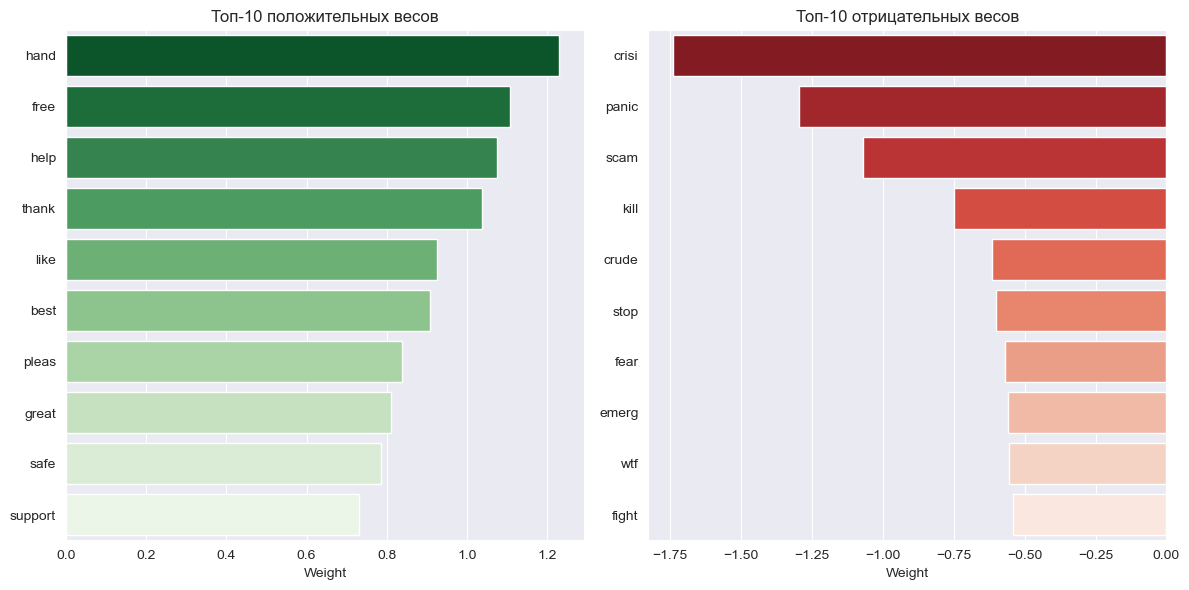

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_train_count = cv_df.transform(x_train)
X_test_count = cv_df.transform(x_test)

pipeline = make_pipeline(
    StandardScaler(with_mean=False),
    LogisticRegression(max_iter=1000, random_state=42)
)
pipeline.fit(X_train_count, y_train)

train_acc = pipeline.score(X_train_count, y_train)
test_acc = pipeline.score(X_test_count, y_test)
print(f"Accuracy (train): {train_acc:.4f}")
print(f"Accuracy (test): {test_acc:.4f}")

lr_model = pipeline.named_steps['logisticregression']
weights = lr_model.coef_[0]
feature_names = cv_df.get_feature_names_out()

top_positive = np.argsort(weights)[-10:][::-1]
top_negative = np.argsort(weights)[:10]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    x=weights[top_positive],
    y=feature_names[top_positive],
    palette='Greens_r'
)
plt.title("Топ-10 положительных весов")
plt.xlabel("Weight")

plt.subplot(1, 2, 2)
sns.barplot(
    x=weights[top_negative],
    y=feature_names[top_negative],
    palette='Reds_r'
)
plt.title("Топ-10 отрицательных весов")
plt.xlabel("Weight")

plt.tight_layout()
plt.show()

**Ответ:** Представленные токены действительно принято считать добрыми или плохими

## Задание 7 Другие признаки (1.5 балла)

Мы были сконцентрированы на работе с текстами твиттов и не использовали другие признаки - имена пользователя, дату и местоположение

Изучите признаки UserName и ScreenName. полезны ли они? Если полезны, то закодируйте их, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

In [107]:
from scipy.stats import pointbiserialr

print(f"Уникальных UserName: {train['UserName'].nunique()}, ScreenName: {train['ScreenName'].nunique()}")
user_corr = pointbiserialr(pd.factorize(train['UserName'])[0], train['Sentiment']).correlation
screen_corr = pointbiserialr(pd.factorize(train['ScreenName'])[0], train['Sentiment']).correlation
print(f"Корреляция с тональностью: UserName={user_corr:.3f}, ScreenName={screen_corr:.3f}")

Уникальных UserName: 23410, ScreenName: 23410
Корреляция с тональностью: UserName=-0.010, ScreenName=-0.010


**Ответ:** Значения имеют малую корреляцию с целевой переменной

Изучите признак TweetAt в обучающей выборке: преобразуйте его к типу datetime и нарисуйте его гистограмму с разделением по цвету на основе целевой переменной. Полезен ли он? Если полезен, то закодируйте его, добавьте к матрице с отскалированными признаками, обучите логистическую регрессию, замерьте качество.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


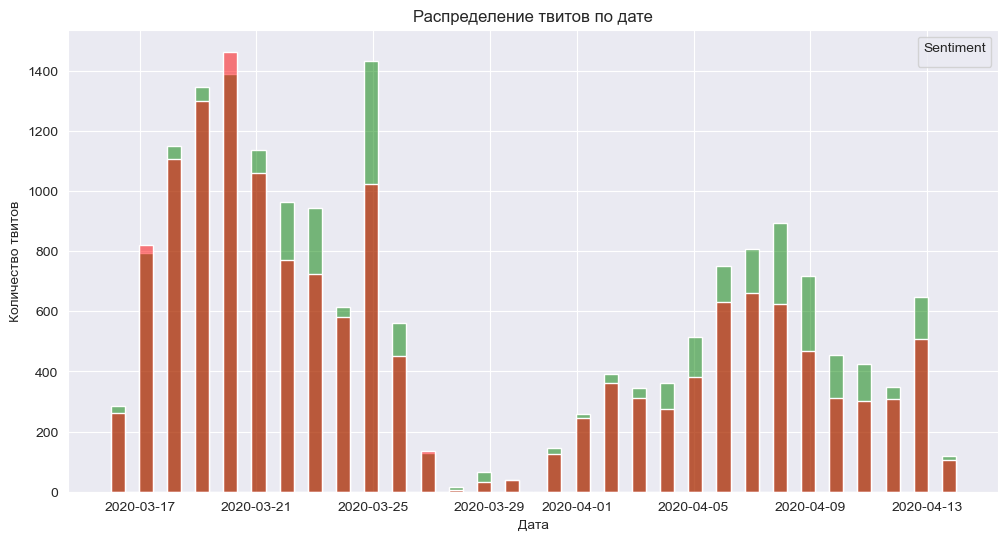

In [114]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='TweetAt', bins=60, alpha=0.5, hue='Sentiment', palette={1: 'green', 0: 'red'})
    
plt.legend(title='Sentiment')
plt.title('Распределение твитов по дате')
plt.xlabel('Дата')
plt.ylabel('Количество твитов')
plt.show()

**Ответ:** Все столбцы диаграммы имеют равное распределение положительных и негативных цветов, а значит дата не имеет большого влияния на целевую переменную



Поработайте с признаком Location в обучающей выборке. Сколько уникальных значений?

In [115]:
train['ScreenName'].nunique()

23410

Постройте гистограмму топ-10 по популярности местоположений (исключая Unknown)

/var/folders/0y/g49_sx310b90y_dbbtzchfpc0000gn/T/ipykernel_60901/2054916123.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


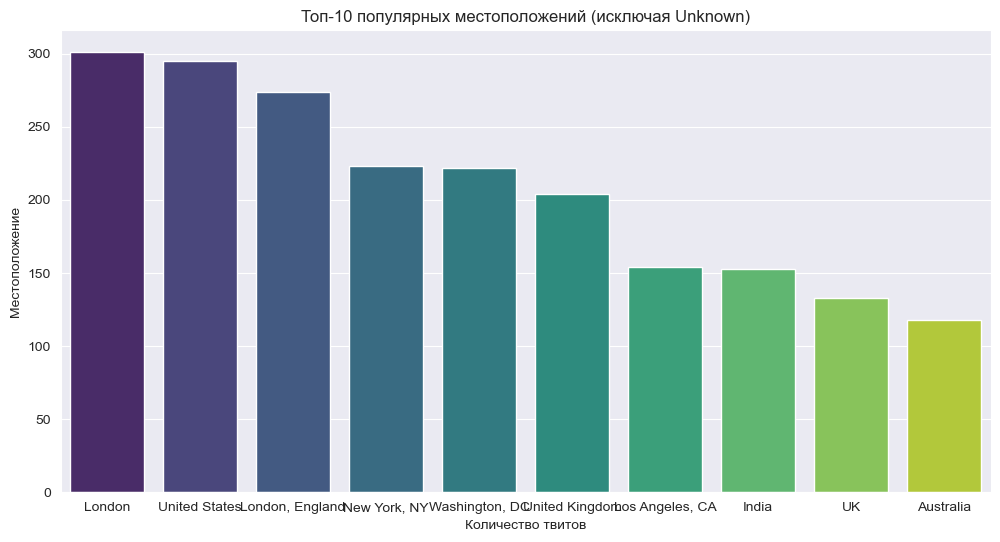

In [117]:
location_counts = (train[train['Location'].notna() &
                         (train['Location'] != 'Unknown')]
                   ['Location']
                   .value_counts()
                   .nlargest(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Топ-10 популярных местоположений (исключая Unknown)')
plt.xlabel('Количество твитов')
plt.ylabel('Местоположение')
plt.show()

Видно, что многие местоположения включают в себя более точное название места, чем другие (Например, у некоторых стоит London, UK; а у некоторых просто UK или United Kingdom).

Создайте новый признак WiderLocation, который содержит самое широкое местоположение (например, из London, UK должно получиться UK). Сколько уникальных категорий теперь? Постройте аналогичную гистограмму.

Уникальных широких местоположений: 4630


/var/folders/0y/g49_sx310b90y_dbbtzchfpc0000gn/T/ipykernel_60901/140002574.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='rocket')


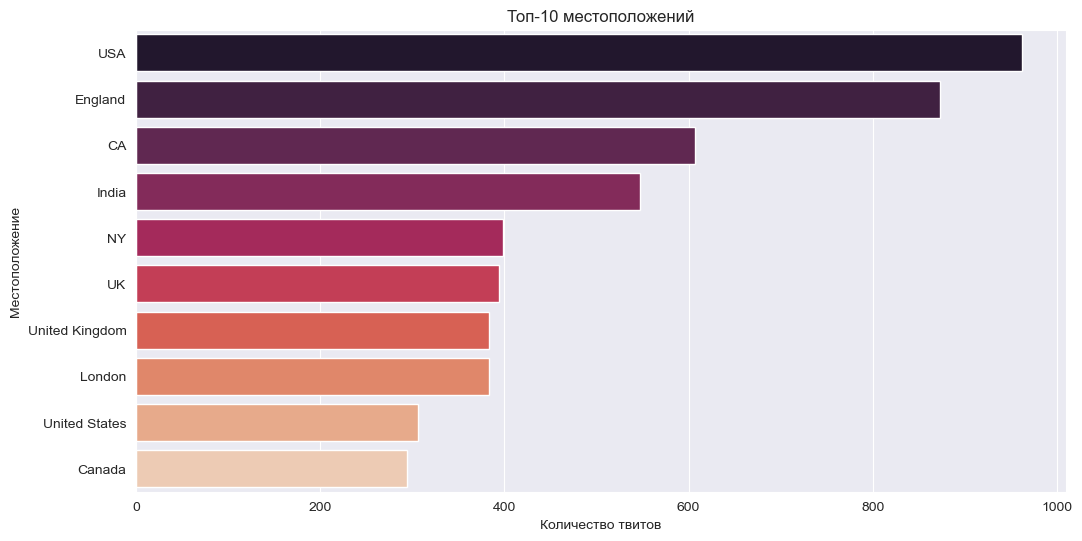

In [125]:
def get_wider_location(loc):
    if pd.isna(loc) or loc == 'Unknown':
        return None
    parts = [p.strip() for p in str(loc).split(',')]
    return parts[-1]

train['WiderLocation'] = train['Location'].apply(get_wider_location)
test['WiderLocation'] = test['Location'].apply(get_wider_location)

print(f"Уникальных широких местоположений: {train['WiderLocation'].nunique()}")

top_locations = (train[train['WiderLocation'].notna()]
                 ['WiderLocation']
                 .value_counts()
                 .nlargest(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='rocket')
plt.title('Топ-10 местоположений')
plt.xlabel('Количество твитов')
plt.ylabel('Местоположение')
plt.show()

Закодируйте признак WiderLocation с помощью OHE таким образом, чтобы создались только столбцы для местоположений, которые встречаются более одного раза. Сколько таких значений?


In [128]:
from sklearn.preprocessing import OneHotEncoder

popular_locs = train['WiderLocation'].value_counts()[lambda x: x > 1].index
encoder = OneHotEncoder(categories=[popular_locs], sparse_output=True, handle_unknown='ignore')
location_ohe = encoder.fit_transform(train[['WiderLocation']].fillna('Unknown').values.reshape(-1, 1))
test_ohe = encoder.transform(test[['WiderLocation']].fillna('Unknown').values.reshape(-1, 1))

Добавьте этот признак к матрице отскалированных текстовых признаков, обучите логистическую регрессию, замерьте качество. Как оно изменилось? Оказался ли признак полезным?


*Подсказка:* используйте параметр `categories` в энкодере.

In [130]:
from scipy.sparse import hstack


tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(train['OriginalTweet'])

X_combined = hstack([X_text, location_ohe])

model = LogisticRegression(max_iter=1000)
model.fit(X_combined, train['Sentiment'])

test['WiderLocation'] = test['Location'].apply(get_wider_location)
test_ohe = encoder.transform(test[['WiderLocation']])
X_test_text = tfidf.transform(test['OriginalTweet'])
X_test_combined = hstack([X_test_text, test_ohe])

base_acc = accuracy_score(test['Sentiment'],
                          LogisticRegression(max_iter=1000)
                          .fit(X_text, train['Sentiment'])
                          .predict(X_test_text))
enhanced_acc = accuracy_score(test['Sentiment'], model.predict(X_test_combined))

print(f"Accuracy до добавления локаций: {base_acc:.4f}")
print(f"Accuracy после добавления локаций: {enhanced_acc:.4f}")

/opt/miniconda3/envs/omo/lib/python3.8/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


Accuracy до добавления локаций: 0.8579
Accuracy после добавления локаций: 0.8525


**Ответ:** Нет, признак оказался бесполезным